In [46]:
import numpy as np
import math
import matplotlib.pyplot as plt
import scipy.stats as stats 
%matplotlib inline
import random
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
from scipy.stats import multivariate_normal

In [47]:
def sigmoid(z):
    return 1./(1+np.exp(-z))

In [48]:
def log_loss(t, y):
    return np.sum((-t*np.log(y) - (1 - t) * (np.log(1 - y))), keepdims=True).flatten()

def diff_log_loss(t, y):
    return np.sum(-(t/y) -(t -1)/(1-y), keepdims=True)

In [49]:
class Layer: #слой реализован в виде класса
  
    
    def __init__(self, n_inp, n_out, lr=0.1):
        self.shape = (n_inp, n_out) #залетают входящие и выходящие значения
        self.lr = lr #шаг обучения
        self.w = np.zeros(self.shape, dtype=np.float32) #веса в начале заданы нулями
        self.b = np.zeros((1, n_out), dtype=np.float32) #смещения в начале заданы нулями
        self._clear_grads() #проход обычного градиентного спуска

    def _clear_grads(self): #градиентный спуск
        self.inp = None
        self.activations = None
        self.d_sigma = None
        self.d_w = None
        self.d_b = None

    def __call__(self, x): #вызов класса
        if len(x.shape) == 1: #если входящие значения одноразмерны - сменить размерность
            x = x.reshape(1, -1)
        self.inp = x #задаем входные значения
        self.activations = sigmoid(x.astype(np.float64).dot(self.w) + self.b) #запуск функции с функцией активации
        return self.activations

    def backward(self, grad): # обратный проход
        self.d_sigma = self.activations * (1 - self.activations) #производная функции ошибки 
        self.d_w = self.grad_w(grad)
        self.d_b = self.grad_b(grad)
        return self.grad_x(grad)

    def grad_w(self, grad):
        return grad * self.inp.T * self.d_sigma

    def grad_b(self, grad):
        return grad * self.d_sigma

    def grad_x(self, grad):
        return self.w.dot(grad) * self.d_sigma

    def step(self):
        self.w -= self.d_w * self.lr
        self.b -= self.d_b * self.lr
        self._clear_grads()
        #return(self.w, self.b)
    
    def logos(self,sample):
        return(sigmoid(sample.dot(self.w) + self.b))

In [50]:
l1 = Layer(2, 1)
l1.shape

(2, 1)

In [51]:
list_of_distr = [1, 0]
list_of_distr


[1, 0]

In [52]:
for i in range(10000):
    
    t = random.choice(list_of_distr)
    if t == 1:
        x = np.random.normal(1.5, 1.0, (2,1))
    else:
        x = np.random.normal(-1.5, 1.0, (2,1))
    y = l1(x.T)
    d_y = diff_log_loss(t, y)
        #print(d_y)
    l1.backward(d_y)
    l1.step()
print(d_y)

[[1.00025418]]


In [53]:
y

array([[0.00025412]])

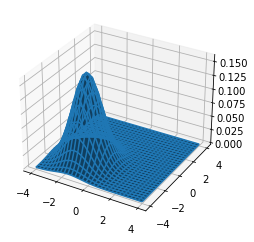

In [40]:

x, y = np.mgrid[-4.0:4.0:30j, -4.0:4.0:30j]

# Need an (N, 2) array of (x, y) pairs.
xy = np.column_stack([x.flat, y.flat])

mu = np.array([-1.5, -1.5])

sigma = np.array([1.0, 1.0])
covariance = np.diag(sigma**2)

z = multivariate_normal.pdf(xy, mean=mu, cov=covariance)

z = z.reshape(x.shape)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.plot_surface(x,y,z)
ax.plot_wireframe(x,y,z)


plt.show()

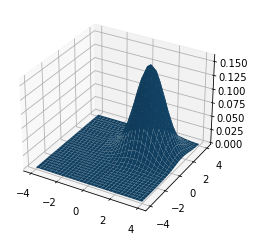

In [41]:
x, y = np.mgrid[-4.0:4.0:30j, -4.0:4.0:30j]

xy = np.column_stack([x.flat, y.flat])

xy = np.column_stack([x.flat, y.flat])

mu = np.array([1.5, 1.5])

sigma = np.array([1.0, 1.0])
covariance = np.diag(sigma**2)

z = multivariate_normal.pdf(xy, mean=mu, cov=covariance)

z = z.reshape(x.shape)

fig = plt.figure()

ax = fig.add_subplot(111, projection='3d')

ax.plot_surface(x,y,z)



plt.show()

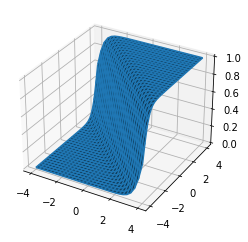

In [42]:
predictor = []
x, y = np.mgrid[-4.0:4.0:30j, -4.0:4.0:30j]

xy = np.column_stack([x.flat, y.flat])
for line in xy:
    g = np.array(line)
    predictor.append(l1(g))
mu = np.array([1.5, -1.5])

sigma = np.array([1.0, 1.0])
covariance = np.diag(sigma**2)

z = np.array(predictor)

# Reshape back to a (30, 30) grid.
z = z.reshape(x.shape)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.plot_surface(x,y,z)
ax.plot_wireframe(x,y,z)

plt.show()

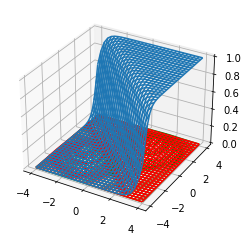

In [45]:
x, y = np.mgrid[-4.0:4.0:30j, -4.0:4.0:30j]
predictor = []
xy = np.column_stack([x.flat, y.flat])
for line in xy:
    g = np.array(line)
    predictor.append(l1(g))
z1 = np.array(predictor)
z1 = z.reshape(x.shape)

mu2 = np.array([1.5, 1.5])

sigma = np.array([1.0, 1.0])
covariance = np.diag(sigma**2)

z2 = multivariate_normal.pdf(xy, mean=mu2, cov=covariance)

z2 = z2.reshape(x.shape)
mu1 = np.array([-1.5, -1.5])
z3 = multivariate_normal.pdf(xy, mean=mu1, cov=covariance)
z3 = z3.reshape(x.shape)
fig = plt.figure()

ax = fig.add_subplot(111, projection='3d')
    
ax.plot_wireframe(x,y,z2, color="green")
ax.plot_wireframe(x,y,z3, color="red")
ax.plot_wireframe(x,y,z1)
#ax.plot_surface(x,y,z1)

plt.show()